# PCA Round 3

In [1]:
import pandas as pd
import os
import csv

# Identify the working directory and data files
working_directory = './25-PCA'

# Create the working directory if needed
try:
    os.makedirs(working_directory, exist_ok=True)
except OSError as error:
    print(f"Error creating {working_directory}: {error}")

In [2]:
# Read the preprocessed data into a dataframe
import pickle

with open('./21-data_preprocessing/dataframe.pickle', 'rb') as f:
    df = pickle.load(f)

In [3]:
verification_row = 9
n_components = 15

In [4]:
df.shape

(5736, 20)

In [5]:
df.head()

,ROW_ID,FOI_TEXT,DEVICE_PROBLEM_CODE,DEVICE_PROBLEM_TEXT,GENERIC_NAME,DEVICE_REPORT_PRODUCT_CODE,UDI-DI,UDI-PUBLIC,DATE_OF_EVENT,REPORTER_OCCUPATION_CODE,REPORT_DATE,EVENT_LOCATION,SOURCE_TYPE,TOKENIZED_TEXT,NOPUNCT_TEXT,NOSTOPWORDS_TEXT,NODIGITS_TEXT,POS_TEXT,LEMMATIZED_TEXT,STEMMED_TEXT
0,1969025,IT WAS REPORTED THAT THE TRANSMITTER LOST CONN...,3283,Wireless Communication Problem,CONTINUOUS GLUCOSE MONITOR,QBJ,,,07/30/2020,000,,I,CONSUMER,"[it, was, reported, that, the, transmitter, lo...","[it, was, reported, that, the, transmitter, lo...","[reported, transmitter, lost, connection, pump...","[reported, transmitter, lost, connection, pump...","[(reported, VBN), (transmitter, NN), (lost, VB...","[report, transmitter, lose, connection, pump, ...","[report, transmitt, lost, connect, pump, great..."
1,1426265,IT WAS REPORTED THAT SIGNAL LOSS OVER ONE HOUR...,3283,Wireless Communication Problem,CONTINUOUS GLUCOSE MONITOR,QBJ,00386270000385,00386270000385,06/05/2020,000,,I,CONSUMER,"[it, was, reported, that, signal, loss, over, ...","[it, was, reported, that, signal, loss, over, ...","[reported, signal, loss, one, hour, occurred, ...","[reported, signal, loss, one, hour, occurred, ...","[(reported, VBN), (signal, JJ), (loss, NN), (o...","[report, signal, loss, one, hour, occur, produ...","[report, signal, loss, one, hour, occur, produ..."
2,2609625,IT WAS REPORTED THAT TRANSMITTER FAILED ERROR ...,1435,No Device Output,CONTINUOUS GLUCOSE MONITOR,QBJ,00386270000385,00386270000385,10/05/2020,000,,I,CONSUMER,"[it, was, reported, that, transmitter, failed,...","[it, was, reported, that, transmitter, failed,...","[reported, transmitter, failed, error, occurre...","[reported, transmitter, failed, error, occurre...","[(reported, VBN), (transmitter, NN), (failed, ...","[report, transmitter, fail, error, occur, data...","[report, transmitt, fail, error, occur, data, ..."
3,2813837,IT WAS REPORTED THAT SIGNAL LOSS OVER ONE HOUR...,3283,Wireless Communication Problem,CONTINUOUS GLUCOSE MONITOR,QBJ,00386270000385,00386270000385,10/23/2020,000,,I,CONSUMER,"[it, was, reported, that, signal, loss, over, ...","[it, was, reported, that, signal, loss, over, ...","[reported, signal, loss, one, hour, occurred, ...","[reported, signal, loss, one, hour, occurred, ...","[(reported, VBN), (signal, JJ), (loss, NN), (o...","[report, signal, loss, one, hour, occur, revie...","[report, signal, loss, one, hour, occur, revie..."
4,1337517,IT WAS REPORTED THAT SIGNAL LOSS OVER ONE HOUR...,3283,Wireless Communication Problem,CONTINUOUS GLUCOSE MONITOR,QBJ,00386270000385,00386270000385,05/25/2020,000,,I,CONSUMER,"[it, was, reported, that, signal, loss, over, ...","[it, was, reported, that, signal, loss, over, ...","[reported, signal, loss, one, hour, occurred, ...","[reported, signal, loss, one, hour, occurred, ...","[(reported, VBN), (signal, JJ), (loss, NN), (o...","[report, signal, loss, one, hour, occur, produ...","[report, signal, loss, one, hour, occur, produ..."


In [6]:
df['FOI_TEXT'][verification_row]

'IT WAS REPORTED THAT SIGNAL LOSS OVER ONE HOUR OCCURRED. NO PRODUCT OR DATA WAS PROVIDED FOR EVALUATION. CONFIRMATION OF THE ALLEGATION AND A PROBABLE CAUSE COULD NOT BE DETERMINED. NO INJURY OR MEDICAL INTERVENTION WAS REPORTED.'

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np

In [8]:
# Remove words that start with a number
df['NODIGITS_TEXT'] = df['FOI_TEXT'].str.replace(r'\b\d+', '', regex=True)
df['NODIGITS_TEXT'].head()

0    IT WAS REPORTED THAT THE TRANSMITTER LOST CONN...
1    IT WAS REPORTED THAT SIGNAL LOSS OVER ONE HOUR...
2    IT WAS REPORTED THAT TRANSMITTER FAILED ERROR ...
3    IT WAS REPORTED THAT SIGNAL LOSS OVER ONE HOUR...
4    IT WAS REPORTED THAT SIGNAL LOSS OVER ONE HOUR...
Name: NODIGITS_TEXT, dtype: object

In [9]:
# Convert the FOI_TEXT column into an array of "sentences"
sentences = df['NODIGITS_TEXT'].tolist()

In [10]:
%pip install --upgrade --quiet sentence-transformers hdbscan mpld3

Note: you may need to restart the kernel to use updated packages.


In [11]:
from sentence_transformers import SentenceTransformer

# define the document embedding model
# https://www.sbert.net/docs/pretrained_models.html
embedder = SentenceTransformer('all-MiniLM-L6-v2')
embedded_sentences = embedder.encode(sentences)
embedded_sentences

array([[-0.00020688,  0.04978941,  0.01154268, ...,  0.00860204,
        -0.05997035, -0.00705215],
       [ 0.00370605,  0.05665789,  0.07931699, ..., -0.05346378,
        -0.09496972, -0.02808946],
       [ 0.00015472,  0.07217848,  0.00413681, ..., -0.03029324,
        -0.05192301, -0.00925278],
       ...,
       [ 0.0120053 ,  0.07438925,  0.00498456, ..., -0.021758  ,
        -0.04155873,  0.00403601],
       [-0.00105845,  0.06564447,  0.00990573, ..., -0.03438512,
        -0.05696326, -0.01080161],
       [-0.00995842,  0.08047495,  0.06453485, ..., -0.04542564,
        -0.03050231, -0.0130733 ]], dtype=float32)

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# "np.array([i for i in df['EMBED']])" Converts the data into a 2d array
embedded_sentences_scaled = scaler.fit_transform(np.array([i for i in embedded_sentences]))

In [13]:
embedded_sentences_scaled

array([[0.6031277 , 0.53244495, 0.4861969 , ..., 0.5065629 , 0.4327188 ,
        0.549564  ],
       [0.62477857, 0.563199  , 0.7942549 , ..., 0.2892867 , 0.29951817,
        0.47227812],
       [0.6051285 , 0.6326933 , 0.45253465, ..., 0.37040067, 0.4633454 ,
        0.54147947],
       ...,
       [0.6706997 , 0.64259213, 0.456388  , ..., 0.4002803 , 0.5027898 ,
        0.5902992 ],
       [0.59841585, 0.60343695, 0.47875643, ..., 0.3560761 , 0.44416323,
        0.53578943],
       [0.5491709 , 0.6698412 , 0.7270649 , ..., 0.31742612, 0.54486835,
        0.52744377]], dtype=float32)

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Vectorize the sentences using TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorized_sentences = vectorizer.fit_transform(sentences)
vectorized_sentences

<5736x1119 sparse matrix of type '<class 'numpy.float64'>'
	with 180935 stored elements in Compressed Sparse Row format>

In [15]:
# Combine the embeddings and vectorized sentences into a single feature matrix
feature_matrix = pd.concat([pd.DataFrame(embedded_sentences_scaled), pd.DataFrame(vectorized_sentences.toarray())], axis=1)

In [16]:
from sklearn.decomposition import PCA
# Fit a PCA model to the data
pca = PCA(n_components=n_components)
pca.fit(feature_matrix)

PCA(n_components=15)

In [17]:
# Transform the data into the PCA space
feature_matrix_pca = pca.transform(feature_matrix)

In [18]:
feature_matrix_pca.shape

(5736, 15)

In [19]:
feature_matrix_pca

array([[-0.15139797, -0.06250462, -0.59099375, ..., -0.05048183,
         0.0038145 , -0.22658607],
       [-0.83896913,  0.30625794,  0.88125631, ...,  0.10207204,
        -0.03763696, -0.00401086],
       [-1.34002867, -1.11016802, -0.98063684, ...,  0.03582744,
         0.14711103, -0.11300014],
       ...,
       [-0.95750805, -1.28003307, -0.95080538, ..., -0.12519907,
        -0.08931519, -0.07875321],
       [-1.32883422, -1.0619659 , -0.93835999, ..., -0.01069702,
         0.14820863, -0.04696937],
       [-0.50663578,  0.2773447 ,  1.01155467, ..., -0.1212187 ,
         0.03069778,  0.28990295]])

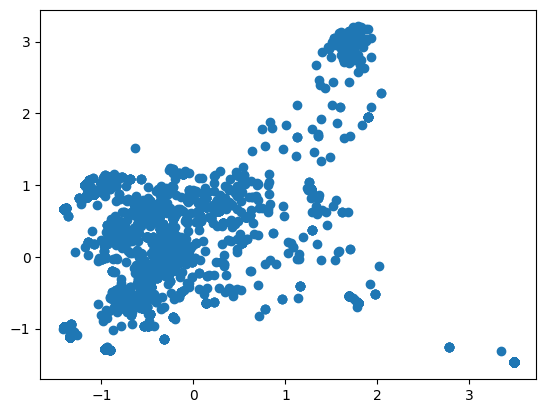

In [20]:
# Visualize the data in the PCA space
import matplotlib.pyplot as plt
plt.scatter(feature_matrix_pca[:,0], feature_matrix_pca[:,1])
plt.show()

In [21]:
# Extract eigenvalues from PCA object
eigenvalues = pca.explained_variance_
eigenvalues

array([2.33647826, 1.4823993 , 1.28633041, 0.65007163, 0.45177014,
       0.41108554, 0.35252571, 0.24629109, 0.20404049, 0.16601881,
       0.14820925, 0.12434603, 0.10358248, 0.09742002, 0.08803329])

In [22]:
# Extract eigenvalues as proportions from PCA object
# (in previous observations, the eigenvalue_proportions == eigenvalues)
eigenvalue_proportions = pca.explained_variance_ratio_
eigenvalue_proportions

array([0.24784432, 0.15724702, 0.13644881, 0.06895701, 0.04792198,
       0.04360632, 0.03739453, 0.02612558, 0.0216438 , 0.01761061,
       0.01572145, 0.01319013, 0.01098762, 0.01033393, 0.00933822])

In [23]:
# the cumulative summary of the explained variance in PCA is a useful tool for understanding and summarizing the results of a PCA analysis. It provides a quick and intuitive summary of the underlying structure in the data, and can be used for both dimensionality reduction and interpretation.
cumulative_variance = np.cumsum(eigenvalues)
cumulative_variance

array([2.33647826, 3.81887756, 5.10520797, 5.7552796 , 6.20704974,
       6.61813527, 6.97066099, 7.21695208, 7.42099256, 7.58701137,
       7.73522061, 7.85956664, 7.96314912, 8.06056914, 8.14860243])

In [24]:
# Calculate the explained variance of each principal component
explained_variance = pca.explained_variance_
explained_variance

array([2.33647826, 1.4823993 , 1.28633041, 0.65007163, 0.45177014,
       0.41108554, 0.35252571, 0.24629109, 0.20404049, 0.16601881,
       0.14820925, 0.12434603, 0.10358248, 0.09742002, 0.08803329])

In [25]:
explained_variance_ratio = pca.explained_variance_ratio_

In [79]:
# Calculate the total explained variance
total_explained_variance = sum(pca.explained_variance_)

print(f"Total explained variance: {total_explained_variance*10:.4f}")

Total explained variance: 81.4860


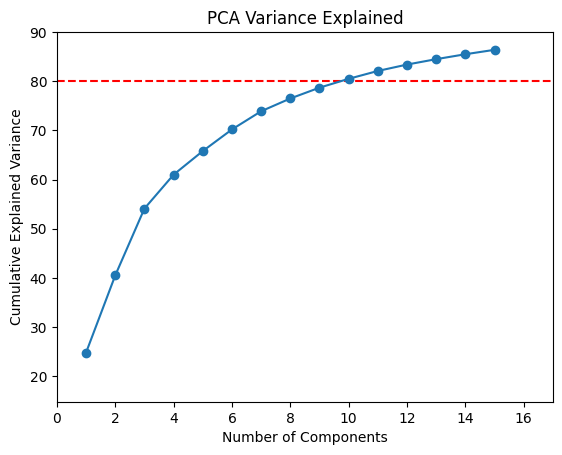

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import mpld3

var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)

plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Variance Explained')
plt.ylim(min(var)-10,90)
plt.xlim(0,17)
plt.style.context('seaborn-whitegrid')
plt.axhline(y=80, color='r', linestyle='--')
plt.plot(range(1, len(cumulative_variance) + 1), var, marker='o')
plt.show()

/home/ec2-user/anaconda3/envs/amazonei_pytorch_latest_p37/lib/python3.7/site-packages/mpld3/mplexporter/exporter.py:84: UserWarning:

Blended transforms not yet supported. Zoom behavior may not work as expected.



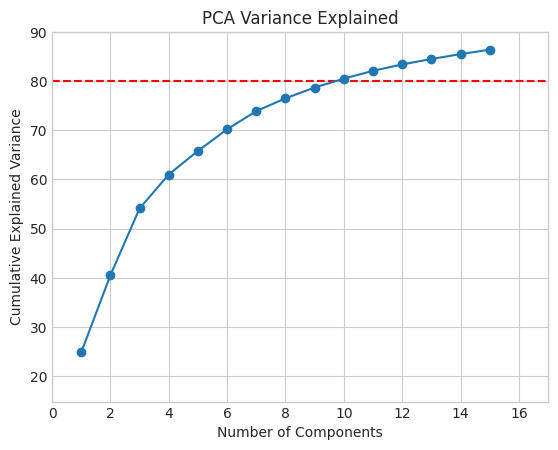

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import mpld3

var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)

fig, ax = plt.subplots()
ax.set_xlabel('Number of Components')
ax.set_ylabel('Cumulative Explained Variance')
ax.set_title('PCA Variance Explained')
ax.set_ylim(min(var)-10,90)
ax.set_xlim(0,17)
plt.style.use('seaborn-whitegrid')
ax.axhline(y=80, color='r', linestyle='--')
ax.plot(range(1, len(cumulative_variance) + 1), var, marker='o')

mpld3.save_html(fig, f"{working_directory}/pca_explained_variance_with_{n_components}_components.html")


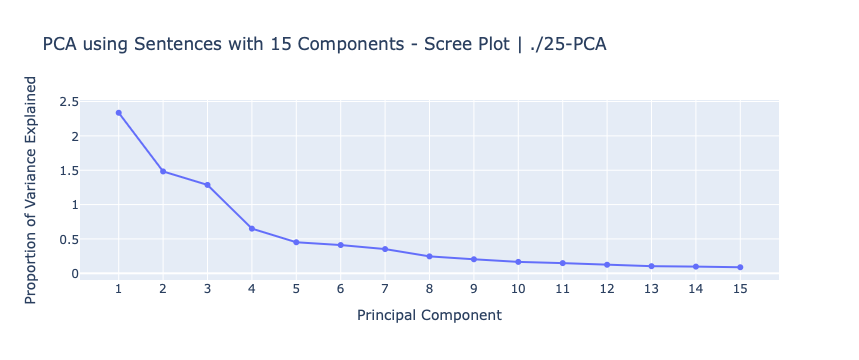

In [46]:
import plotly.express as px
import plotly.io as pio

# Create scree plot using plotly.express
fig_1 = px.line(
    x=np.arange(1, len(cumulative_variance)+1), 
    y=pca.explained_variance_,
    markers=True, 
    labels={'x': 'Principal Component', 'y': 'Proportion of Variance Explained'},
    title=f"PCA using Sentences with {n_components} Components - Scree Plot | {working_directory}"
)

fig_1.update_layout(
    xaxis={
        'tickmode': 'linear', # Set tick mode to linear
        'dtick': 1, # Set tick interval to 1
        'tick0': 0 # Start tick at 0
    }
)

pio.write_html(
    fig_1, 
    auto_open=True,
    file=f"{working_directory}/pca_scree_plot_with_{n_components}_components.html"
)

fig_1.show()

## 4. Use the PCA Results for t-SNE and HDBSCAN
### t-SNE
t-SNE stands for t-Distributed Stochastic Neighbor Embedding. It is a popular nonlinear dimensionality reduction technique used in machine learning and data visualization.

The main goal of t-SNE is to reduce high-dimensional data into a lower-dimensional representation that captures the underlying structure of the data. It works by constructing a probability distribution over pairs of high-dimensional objects in such a way that similar objects have a high probability of being picked while dissimilar objects have a low probability of being picked. It then constructs a similar probability distribution over the low-dimensional points and minimizes the divergence between the two distributions using gradient descent. The resulting low-dimensional points can then be visualized in a scatter plot or used as features for other machine learning models.

t-SNE is especially useful for visualizing high-dimensional data in a 2D or 3D space, as it can reveal clusters, patterns, and structures in the data that may not be apparent in the original high-dimensional space.

### HDBSCAN
HDBSCAN stands for Hierarchical Density-Based Spatial Clustering of Applications with Noise. It is a popular density-based clustering algorithm used in machine learning and data analysis.

The main goal of HDBSCAN is to partition a dataset into clusters of high-density regions while identifying points that do not belong to any cluster (i.e., noise). It works by first constructing a hierarchy of clusters based on the density of the data points. It then determines the most stable partition of the data, which is the clustering that gives the best balance between the number of clusters and the density of the points within each cluster. The stability of the clustering is determined by a robustness criterion that takes into account the persistence of the clusters across different levels of the hierarchy.

HDBSCAN is particularly useful for clustering datasets that have complex structures and contain clusters of varying densities and shapes. It can handle datasets with noisy and sparse data points and is capable of detecting outliers and small clusters that may be overlooked by other clustering algorithms. 


In [29]:
from sklearn.manifold import TSNE

# create a t-SNE object; fit and transform the PCA result
tsne = TSNE(n_components=3, init='pca', learning_rate='auto')

tsne_result = tsne.fit_transform(feature_matrix_pca)

/home/ec2-user/anaconda3/envs/amazonei_pytorch_latest_p37/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:986: FutureWarning:

The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.



In [30]:
len(tsne_result)

5736

In [31]:
tsne_result

array([[ -7.7720838 ,  -2.2201784 , -11.75325   ],
       [ -6.428513  ,   0.35287282,  19.699505  ],
       [-10.761452  , -18.308996  ,  -7.973053  ],
       ...,
       [  1.9297061 , -27.109402  , -28.553087  ],
       [-21.50697   , -18.689278  ,  16.95779   ],
       [ 11.851731  ,   6.368714  ,  12.485649  ]], dtype=float32)

In [32]:
from hdbscan import HDBSCAN
hdbscan = HDBSCAN()
clusters = hdbscan.fit_predict(tsne_result)

In [33]:
len(clusters)

5736

In [34]:
clusters

array([219, 118, 132, ...,   4,  44, 192])

In [35]:
# Create a grouping of values by cluster value
# ie, clusters[0] and clusters[2] will have the same cluster value.
# sort by size (number of items in the group)
# determine how dense each cluster is 
# use the python 'counter' class

# after sorting, analyze and manually create the cluster 'affinity'
# create a new 'clusters' array with the value for the cluster affinity

# FUTURE: For example,
# classify senteneces into "3" classes
# then have "2" labels
# then combine the labels for the FOI_TEXT
# - use one label for the FOI_TEXT
# - another model or rule that takes the labels and FOI_TEXT as input and determines a single FOI_TEXT label
# - other aggregration strategies for the FOI_TEXT label...


# Reviewing the text
# - all the sentences in the cluster make sense and the entire cluster can be labeled the same
# - or the clustering was bad and has too many exceptions; data needs to be split into a much better clustering
#
# ie, they will be consistent and easily label-able or inconsistent and the clustering method needs to be revisited
# - switch out HDBSCAN
# - reduce dimensionality
# - others...


## 5. Generate a Scatter Plot
Using the PCA data, generate a 2D scatterplot.

- [Plotly Color Scales](https://plotly.com/python/builtin-colorscales/)

In [36]:
# break the PCA coordinates into X and Y columns
df[['x','y','z']] = tsne_result.tolist()
len(df)

5736

In [60]:
# Using the plotly express library to write the plot to a file
# https://plotly.com/python/interactive-html-export/
import plotly.express as px

# https://plotly.com/python/figure-labels/
fig_2d = px.scatter(
    df, 
    x='x', 
    y='y',
    color=clusters,
    custom_data=['ROW_ID', 'DEVICE_PROBLEM_TEXT'],
    title=f"PCA using Sentences with {n_components} Components - Scatter Plot in 2D | {working_directory}"
)

# https://stackoverflow.com/questions/59057881/python-plotly-how-to-customize-hover-template-on-with-what-information-to-show
fig_2d.update_traces(
    hovertemplate="<br>".join([
        "x: %{x}",
        "y: %{y}",
        "Color: %{marker.color}",
        "ROW_ID: %{customdata[0]}",
        "TEXT: %{customdata[1]}"
    ])
)

# write the 2d scatter plot to a file in the working directory
fig_2d.write_html(f"{working_directory}/pca_2d_plot_with_{n_components}_components.html")

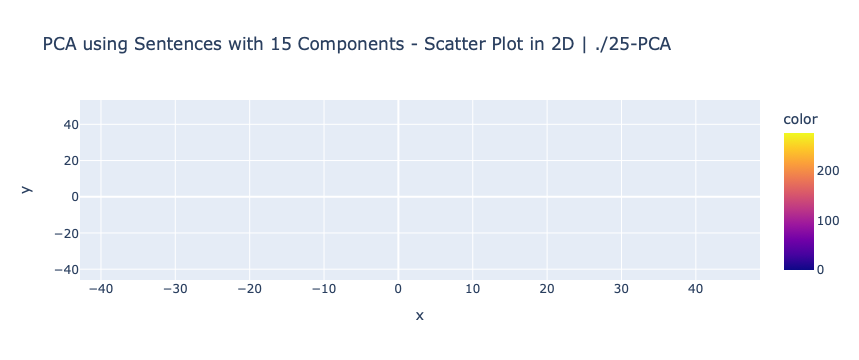

In [61]:
fig_2d.show()

## 6. Generate a 3D Scatter Plot
Using the PCA data, generate a 3D scatterplot.

In [55]:
import plotly.graph_objs as go

z = np.linspace(0, 10, 50)
x = np.cos(z)
y = np.sin(z)

trace = go.Scatter3d(
    x = df['x'], 
    y = df['y'], 
    z = df['z'], 
    mode = 'markers', 
    marker = dict(
      color=clusters,
      colorscale = 'Plasma'
    )
)

layout = go.Layout(
    showlegend=True,
    title=f"PCA using Sentences with {n_components} Components - Scatter Plot in 3D | {working_directory}"
)

fig_3d = go.Figure(data=[trace], layout=layout)

# write the 3d scatter plot to a file in the working directory
fig_3d.write_html(f"{working_directory}/pca_3d_plot_with_{n_components}_components.html")

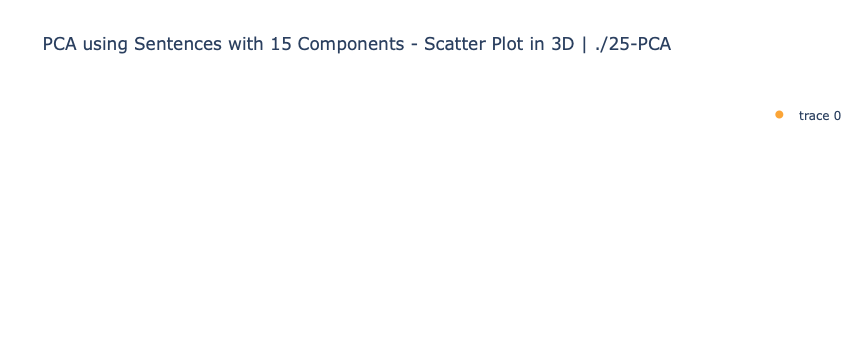

In [56]:
fig_3d.show()

In [53]:
import plotly.graph_objs as go

z = np.linspace(0, 10, 50)
x = np.cos(z)
y = np.sin(z)

trace = go.Scatter3d(
    x=df['x'],
    y=df['y'],
    z=df['z'],
    mode='markers',
    marker=dict(
        color=clusters,
        colorscale='Plasma'
    )
)

# Define a button to toggle the color trace on and off
color_button = dict(
    label='Color',
    method='restyle',
    args=[{'marker.color': [clusters if trace.marker.color == 'rgba(0,0,0,0)' else 'rgba(0,0,0,0)']}]
)

layout = go.Layout(
    showlegend=True,
    title=f"PCA using Sentences with {n_components} Components - Scatter Plot in 3D | {working_directory}",
    updatemenus=[dict(
        type='buttons',
        showactive=True,
        buttons=[color_button]
    )]
)

fig_3d_v2 = go.Figure(data=[trace], layout=layout)

# write the 3d scatter plot to a file in the working directory
#fig_3d_v2.write_html(f"{working_directory}/pca_3d_plot_with_{n_components}_components.html")


/home/ec2-user/anaconda3/envs/amazonei_pytorch_latest_p37/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



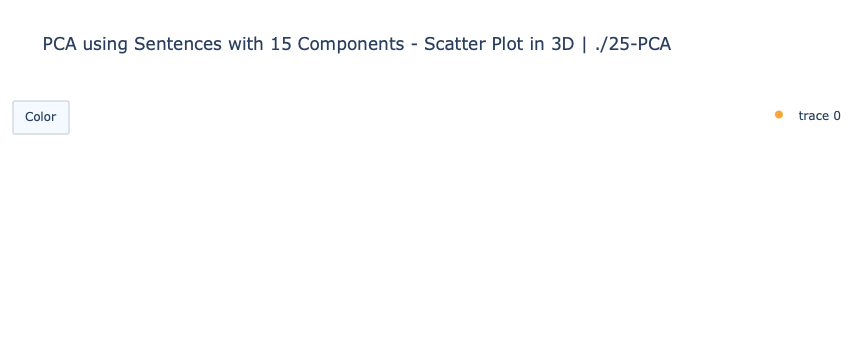

In [54]:
fig_3d_v2.show()

## Upload All Output to an S3 Bucket

In [86]:
import os
import fnmatch
import subprocess

bucket = "praxis-2023-html-output"
website = f"http://{bucket}.s3-website-us-west-2.amazonaws.com"

# Use the fnmatch module to find all files in the current directory that end in ".html"
file_list = []
for root, dirnames, filenames in os.walk("."):
    for filename in fnmatch.filter(filenames, '*.html'):
        file_list.append(os.path.join(root, filename))

# Sort the file list alphabetically
file_list.sort()

# Create the HTML file and write the header
with open(os.path.join(".", 'index.html'), 'w') as f:
    f.write('''<html>
        <head>
            <title>Praxis 2023 HTML Output</title>
            <style>
                table {
                    border-collapse: collapse;
                    width: 100%;
                }
                th, td {
                    text-align: left;
                    padding: 8px;
                }
                th {
                    background-color: #007bff;
                    color: #fff;
                    font-weight: bold;
                }
                tr:nth-child(even) {
                    background-color: #f2f2f2;
                }
                tr:hover {
                    background-color: #ddd;
                }
            </style>
        </head>
        <body>
            <table>
                <tr><th>Name</th><th>Size</th></tr>\n
    ''')

    # Loop through each file and add a row to the table
    for file_name in file_list:
        if file_name in ['./index.html']:
            continue
            
        file_size = os.path.getsize(file_name)
        f.write(f'<tr><td><a href="{website}/{file_name}" target="_blank" rel="noopener noreferrer">{file_name}</a></td><td>{int(file_size / 1048576)} MB</td></tr>\n')

    # Write the footer and close the file
    f.write('</table></body></html>')

command = ["aws", "s3", "sync", ".", f"s3://{bucket}", "--exclude", "*", "--include", "*.html", "--no-progress"]

# Run the command and wait for it to complete
output = subprocess.run(command, capture_output=True, text=True)

# Print the output
print(output.stdout)
print('fin')

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
upload: 25-PCA/pca_explained_variance_with_15_components.html to s3://praxis-2023-html-output/25-PCA/pca_explained_variance_with_15_components.html
upload: ./index.html to s3://praxis-2023-html-output/index.html

fin
